In [36]:
pip install mlxtend

                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB 262.6 kB/s eta 0:00:06
     -                                        0.0/1.4 MB 245.8 kB/s eta 0:00:06
     -                                        0.1/1.4 MB 328.2 kB/s eta 0:00:05
     ----                                     0.2/1.4 MB 700.2 kB/s eta 0:00:02
     -----------                              0.4/1.4 MB 1.4 MB/s eta 0:00:01
     -----------------                        0.6/1.4 MB 1.9 MB/s eta 0:00:01
     ---------------------------              1.0/1.4 MB 2.9 MB/s eta 0:00:01
     ---------------------------              1.0/1.4 MB 2.9 MB/s eta 0:00:01
     ---------------------------------------- 1.4/1.4 MB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [40]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import pickle

In [2]:
df = pd.read_csv('placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


#### Preprocess EDA Feature selection

#### Removing column which are not required for prediction

In [4]:
df = df.iloc[:, 1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [5]:
df.shape

(100, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


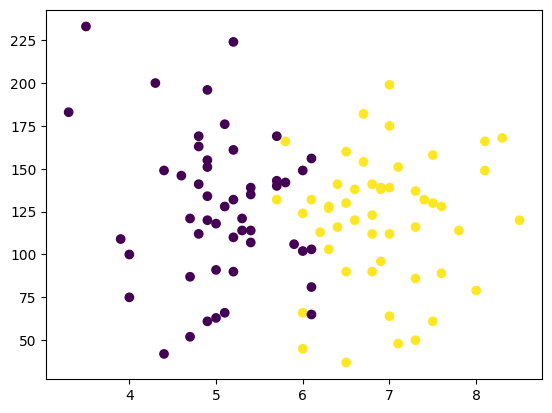

In [10]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

#### Extracting input & output cols from df

In [11]:
X = df.iloc[:, :2]
y = df.iloc[:, -1]

In [12]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [13]:
X.shape

(100, 2)

In [14]:
y.shape

(100,)

#### Splitting df into training and testing dataset

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 2)
(10, 2)
(90,)
(10,)


#### Scaling values

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [26]:
X_train

array([[-0.27173866,  0.50486389],
       [-0.53099463,  0.30064928],
       [-0.70383195, -0.33752136],
       [ 0.76528521,  0.40275658],
       [-0.70383195,  0.2240688 ],
       [-0.96308791, -0.08225311],
       [-0.01248269, -1.99676503],
       [-0.61741329, -0.23541406],
       [-1.74085582, -1.23096026],
       [-0.01248269, -1.46070169],
       [-0.09890135, -0.43962866],
       [ 0.33319193, -0.18436041],
       [ 1.11095984,  0.35170293],
       [-1.3951812 , -2.07334551],
       [ 0.07393596,  0.83671262],
       [-0.87666926, -0.82253105],
       [-1.04950657,  1.16856135],
       [ 0.07393596, -0.51620914],
       [-0.01248269,  0.0198542 ],
       [ 0.93812252,  0.70907849],
       [ 0.24677327,  0.1219615 ],
       [-0.27173866,  0.42828341],
       [ 0.24677327,  0.09643467],
       [ 0.93812252, -1.92018456],
       [-0.96308791, -1.58833582],
       [-1.22234388,  0.58144436],
       [ 1.11095984, -0.95016518],
       [ 0.41961059,  0.93881992],
       [ 0.67886656,

In [27]:
X_test

array([[-0.73860703,  0.0270188 ],
       [-0.52136967, -0.13059089],
       [-0.73860703, -1.36895278],
       [ 2.51995341,  0.88261429],
       [-0.41275099, -0.44581028],
       [ 0.02172374,  0.3422382 ],
       [-0.62998835,  2.1885232 ],
       [ 0.89067319,  0.25217551],
       [ 0.45619846, -0.31071626],
       [-0.84722571, -1.43649979]])

#### Train the model

In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#### Evaluating model

In [30]:
y_predict = model.predict(X_test)

In [31]:
print(y_predict) # only one prediction is wrong. 90% accuracy
print(y_test)

[0 0 0 1 0 1 0 1 1 0]
86    0
2     0
9     0
65    1
81    0
4     0
16    0
48    1
99    1
7     0
Name: placement, dtype: int64


In [34]:
accuracy_score(y_predict, y_test)

0.9

#### checking how model classified the data using linear line

<Axes: >

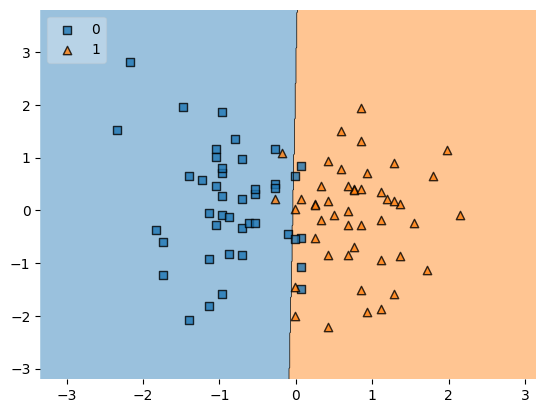

In [39]:
plot_decision_regions(X_train, y_train.values, clf=model, legend=2)

#### converting model into binary file, write binary

In [41]:
pickle.dump(model, open('model.pkl','wb'))